In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
stock_data = pd.read_csv('vn30_index_stocks.csv')

In [3]:
stock_data['DTYYYYMMDD'] = pd.to_datetime(stock_data['DTYYYYMMDD'], format= '%d/%m/%Y')

In [4]:
stock_data.set_index("DTYYYYMMDD", inplace= True)
stock_data

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2017-08-30,NaN,14.5594,47.7450,13.3333,17.0812,40.4851,NaN,NaN,8.7160,11.7506,...,11.45,NaN,NaN,23.0439,NaN,36.1457,71.7676,79.3322,7.9209,NaN
2017-08-31,NaN,15.5752,47.8338,13.6927,17.3314,40.4851,NaN,NaN,8.7660,11.7506,...,11.70,NaN,NaN,23.1062,NaN,35.9988,71.8251,79.5466,7.9209,NaN
2017-09-01,NaN,15.8385,48.4550,13.6927,17.3671,41.0672,NaN,NaN,8.7785,11.7506,...,11.60,NaN,NaN,23.3242,NaN,36.2927,73.2639,81.2083,7.9209,NaN
2017-09-05,NaN,15.7633,48.5438,13.5849,17.3314,41.8432,NaN,NaN,8.8535,11.7506,...,11.85,NaN,NaN,23.7602,NaN,36.8804,75.1631,81.7979,7.9427,NaN
2017-09-06,NaN,15.4999,48.3663,13.4771,17.2242,42.1019,NaN,NaN,9.0036,11.7506,...,11.65,NaN,NaN,23.6667,NaN,36.7335,75.2782,80.9403,8.3245,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,19.0866,34.2000,49.7972,25.5000,70.5959,86.8555,21.9120,16.1698,22.6500,30.5912,...,21.60,35.05,16.1856,66.7200,58.4,62.9000,115.0000,71.4977,19.0014,29.10
2022-09-20,19.1284,35.1500,51.0163,26.0000,70.8508,87.7402,22.4862,16.3678,23.0000,30.3639,...,22.15,35.05,16.4445,67.0586,58.9,63.9000,116.1000,72.0681,19.0650,29.05
2022-09-21,18.8778,34.7500,51.6728,25.5500,69.9163,87.6597,22.2469,16.3018,22.9000,28.5912,...,21.75,34.50,16.3474,66.8046,58.3,63.1000,115.0000,73.1140,18.7472,28.60


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1268 entries, 2017-08-30 to 2022-09-23
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACB     443 non-null    float64
 1   BID     1265 non-null   float64
 2   BVH     1265 non-null   float64
 3   CTG     1266 non-null   float64
 4   FPT     1265 non-null   float64
 5   GAS     1265 non-null   float64
 6   GVR     632 non-null    float64
 7   HDB     1175 non-null   float64
 8   HPG     1264 non-null   float64
 9   KDH     1266 non-null   float64
 10  MBB     1266 non-null   float64
 11  MSN     1266 non-null   float64
 12  MWG     1266 non-null   float64
 13  NVL     1264 non-null   float64
 14  PDR     1266 non-null   float64
 15  PLX     1266 non-null   float64
 16  PNJ     1265 non-null   float64
 17  POW     923 non-null    float64
 18  SAB     1266 non-null   float64
 19  SSI     1266 non-null   float64
 20  STB     1265 non-null   float64
 21  TCB     1080 non-nu

In [6]:
plot_stock_data = stock_data.dropna(how= 'all')
plot_stock_data = plot_stock_data.reset_index().melt(id_vars= 'DTYYYYMMDD', var_name= 'Stock', value_name= 'Closing Price')

fig = px.line(plot_stock_data, x= 'DTYYYYMMDD', y= 'Closing Price', color= 'Stock', title= 'Stock Closing Prices Over Time', width= 1400, height= 800)
fig.show()


In [7]:
stock_data_pct_change = stock_data.pct_change()
stock_data_pct_change = stock_data_pct_change.iloc[1:]

## Annual Risk & Annual Return

### Last 3 Years

In [8]:
start_date = '2019-09-23'
end_date = '2022-09-23'

stock_data_pct_change_3_years = stock_data_pct_change.loc[start_date:end_date]
stock_data_pct_change_3_years

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2019-09-23,NaN,-0.008752,0.015278,-0.004742,-0.029209,0.006810,NaN,0.001898,-0.028700,-0.003984,...,0.019324,-0.021598,-0.006714,-0.024692,-0.001116,-0.003350,-0.002899,0.019656,0.000000,-0.007364
2019-09-24,NaN,-0.005045,0.001368,-0.011904,-0.005310,0.000000,NaN,-0.005682,0.006820,0.014003,...,-0.004739,-0.002208,0.004499,0.020254,0.000000,0.009244,0.000000,0.019277,-0.002343,0.002967
2019-09-25,NaN,0.011407,-0.015028,0.002411,0.021351,-0.010629,NaN,0.007619,-0.011287,0.025638,...,0.009524,0.002212,0.000000,0.001240,0.000000,-0.003331,-0.011628,-0.003940,0.002348,-0.008876
2019-09-26,NaN,0.006265,0.002774,0.016823,0.005227,0.015625,NaN,0.001890,0.015980,-0.001920,...,0.009434,0.019868,0.008968,0.003719,-0.008939,-0.005848,0.000000,0.028481,0.011673,-0.022388
2019-09-27,NaN,0.002493,0.013830,0.000000,0.013865,0.009617,NaN,0.005661,-0.004492,0.000000,...,-0.004673,0.004329,-0.004439,0.023456,0.006764,0.006723,0.004412,0.000769,0.023102,0.015267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,-0.012959,-0.036620,-0.051785,-0.026718,0.007272,-0.027028,-0.069107,-0.020000,-0.015217,-0.007375,...,-0.037862,-0.026389,-0.049427,-0.014999,-0.020134,0.006400,-0.006050,-0.010526,-0.021278,-0.025126
2022-09-20,0.002190,0.027778,0.024481,0.019608,0.003611,0.010186,0.026205,0.012245,0.015453,-0.007430,...,0.025463,0.000000,0.015996,0.005075,0.008562,0.015898,0.009565,0.007978,0.003347,-0.001718
2022-09-21,-0.013101,-0.011380,0.012868,-0.017308,-0.013190,-0.000917,-0.010642,-0.004032,-0.004348,-0.058382,...,-0.018059,-0.015692,-0.005905,-0.003788,-0.010187,-0.012520,-0.009475,0.014513,-0.016669,-0.015491


In [9]:
avg_annual_ret_3_years = stock_data_pct_change_3_years.mean() * 250
avg_annual_std_3_years = stock_data_pct_change_3_years.std() * np.sqrt(250)

stock_ret_std_3_years = pd.DataFrame([avg_annual_ret_3_years, avg_annual_std_3_years], index= ['Annual Return', 'Annual Volatility']).transpose()
stock_ret_std_3_years

,Annual Return,Annual Volatility
ACB,0.174362,0.306857
BID,0.113298,0.361371
BVH,0.015241,0.375875
CTG,0.222494,0.370309
FPT,0.340117,0.297635
GAS,0.133357,0.369357
GVR,0.430775,0.478930
HDB,0.277640,0.358238
HPG,0.324333,0.352395
KDH,0.205636,0.303218


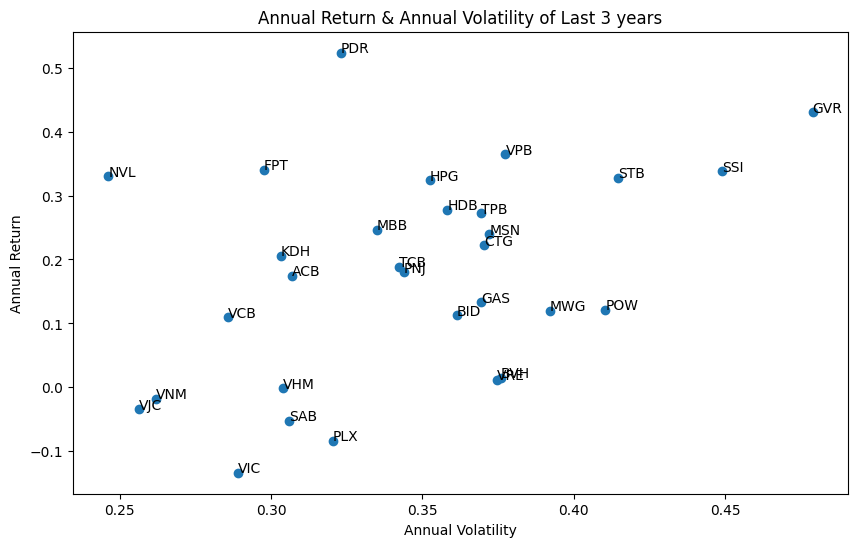

In [10]:
plt.figure(figsize= (10, 6))
plt.scatter(stock_ret_std_3_years['Annual Volatility'], stock_ret_std_3_years['Annual Return'])

for i, stock in enumerate(stock_ret_std_3_years.index):
    plt.annotate(stock, (stock_ret_std_3_years['Annual Volatility'][i], stock_ret_std_3_years['Annual Return'][i]))

plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.title('Annual Return & Annual Volatility of Last 3 years')
plt.show()

### Whole Dataset

In [11]:
avg_annual_ret = stock_data_pct_change.mean() * 250
avg_annual_std = stock_data_pct_change.std() * np.sqrt(250)

stock_ret_std = pd.DataFrame([avg_annual_ret, avg_annual_std], index= ['Annual Return', 'Annual Volatility']).transpose()
stock_ret_std

,Annual Return,Annual Volatility
ACB,0.174362,0.306857
BID,0.245652,0.384235
BVH,0.098315,0.377252
CTG,0.195462,0.377686
FPT,0.317555,0.279640
GAS,0.232155,0.382879
GVR,0.430775,0.478930
HDB,0.119940,0.353008
HPG,0.248718,0.345733
KDH,0.216059,0.288257


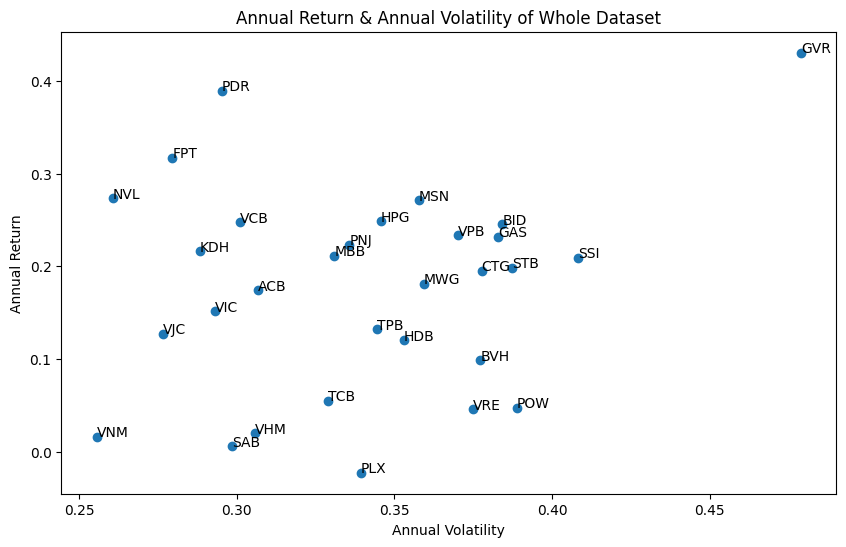

In [12]:
plt.figure(figsize= (10, 6))
plt.scatter(stock_ret_std['Annual Volatility'], stock_ret_std['Annual Return'])

for i, stock in enumerate(stock_ret_std.index):
    plt.annotate(stock, (stock_ret_std['Annual Volatility'][i], stock_ret_std['Annual Return'][i]))

plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.title('Annual Return & Annual Volatility of Whole Dataset')
plt.show()


## Portfolio Optimisation for 10 stocks

In [13]:
stock_list_10 = ['FPT', 'HPG', 'KDH', 'MBB', 'MSN', 'NVL', 'PDR', 'PNJ', 'VCB', 'VPB']
stock_10 = stock_data_pct_change[stock_list_10]

In [14]:
stock_10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2017-08-31 to 2022-09-23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FPT     1267 non-null   float64
 1   HPG     1267 non-null   float64
 2   KDH     1267 non-null   float64
 3   MBB     1267 non-null   float64
 4   MSN     1267 non-null   float64
 5   NVL     1267 non-null   float64
 6   PDR     1267 non-null   float64
 7   PNJ     1267 non-null   float64
 8   VCB     1267 non-null   float64
 9   VPB     1267 non-null   float64
dtypes: float64(10)
memory usage: 141.2 KB


In [15]:
np.random.seed(0)
weight_10 = np.random.random(10)
weight_10 = weight_10/sum(weight_10)
weight_10

array([0.08912692, 0.11614624, 0.09788834, 0.08848864, 0.06880123,
       0.10489274, 0.07106385, 0.14482329, 0.15649814, 0.06227063])

In [16]:
port_ann_ret_10 = np.dot(weight_10, np.mean(stock_10))*250

print('Annual Portfolio Return of 10 Stocks:')
print(port_ann_ret_10)

Annual Portfolio Return of 10 Stocks:
0.25781465593035346


C:\Users\Admins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [17]:
port_ann_std_10 = np.sqrt(np.dot(np.dot(weight_10,stock_10.cov()),np.transpose(weight_10)))*np.sqrt(250)

print('Annual Portfolio Volatility of 10 Stocks:')
print(port_ann_std_10)

Annual Portfolio Volatility of 10 Stocks:
0.20863796166457055


### Portfolio Optimisation applying the Monte Carlo Simulation

In [18]:
num_portfolios = 25000
port_ret_10 = []
port_std_10 = []
port_sharpe_ratio_10 = []
weight_10_list = []
rfr = 0.05

for i in range(num_portfolios):
  np.random.seed(i)
  weight_10 = np.random.random(10)
  weight_10 = weight_10/sum(weight_10)
  weight_10_list.append(weight_10)
  port_ann_ret_10 = np.dot(weight_10,stock_10.mean())*250
  port_ann_std_10 = np.sqrt(np.dot(np.dot(weight_10,stock_10.cov()), np.transpose(weight_10)))*np.sqrt(250)
  port_ret_10.append(port_ann_ret_10)
  port_std_10.append(port_ann_std_10)
  sharpe_ratio_10 = (port_ann_ret_10 - rfr) / port_ann_std_10
  port_sharpe_ratio_10.append(sharpe_ratio_10)

In [19]:
max_sharpe_idx_10 = np.argmax(port_sharpe_ratio_10)
max_sharpe_ratio_10 = port_sharpe_ratio_10[max_sharpe_idx_10]
max_sharpe_return_10 = port_ret_10[max_sharpe_idx_10]
max_sharpe_std_10 = port_std_10[max_sharpe_idx_10]

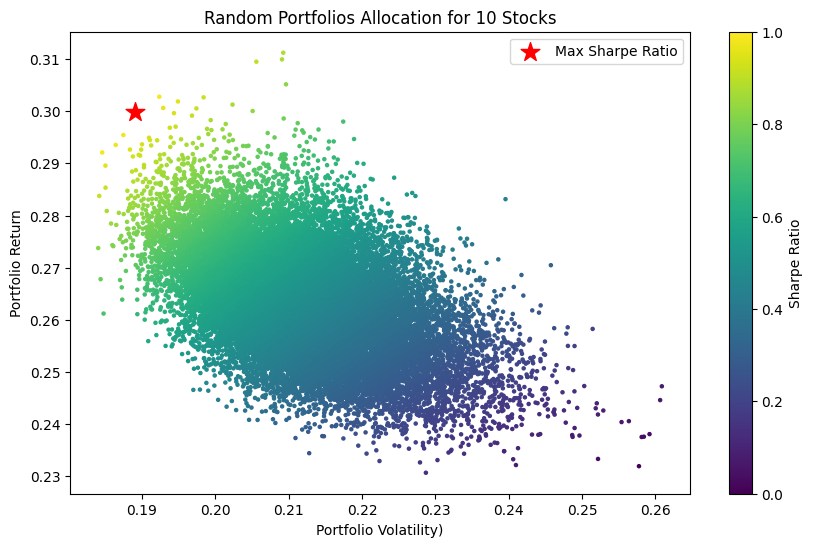

In [20]:
plt.figure(figsize= (10, 6))
plt.scatter(port_std_10, port_ret_10, c= port_sharpe_ratio_10, s= 5)
plt.scatter(max_sharpe_std_10, max_sharpe_return_10, marker= '*', color= 'r', s= 200, label= 'Max Sharpe Ratio')
plt.title('Random Portfolios Allocation for 10 Stocks')
plt.xlabel('Portfolio Volatility)')
plt.ylabel('Portfolio Return')
plt.legend()
plt.colorbar(label= 'Sharpe Ratio')
plt.show()

In [21]:
top_sharpe_ratio_10 = np.argsort(port_sharpe_ratio_10)[::-1]

for i in range(5):
  top_portfolio_index = top_sharpe_ratio_10[i]
  top_sharpe_ratio = port_sharpe_ratio_10[top_portfolio_index]
  print(f"Top {i+1} Sharpe Ratio: {top_sharpe_ratio}, Portfolio: {top_portfolio_index}")

Top 1 Sharpe Ratio: 1.3215185092646078, Portfolio: 21008
Top 2 Sharpe Ratio: 1.313968408770396, Portfolio: 8424
Top 3 Sharpe Ratio: 1.3113686325627332, Portfolio: 8945
Top 4 Sharpe Ratio: 1.309054355367744, Portfolio: 20590
Top 5 Sharpe Ratio: 1.3062305029470516, Portfolio: 11344


In [22]:
best_portfolio_10 = pd.DataFrame({'Stock': stock_list_10, 'Weight': weight_10_list[21008]})
best_portfolio_10

,Stock,Weight
0,FPT,0.259383
1,HPG,0.031951
2,KDH,0.006475
3,MBB,0.004359
4,MSN,0.160843
5,NVL,0.248456
6,PDR,0.175056
7,PNJ,0.012888
8,VCB,0.066118
9,VPB,0.034472


## Portfolio Optimisation for 20 stocks

In [23]:
stock_list_20 = ['ACB', 'BID', 'CTG', 'FPT', 'GAS', 'GVR', 'HPG', 'HDB', 'KDH', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PNJ', 'TPB', 'VCB', 'VIC', 'VJC', 'VPB']
stock_20 = stock_data_pct_change[stock_list_20]

In [24]:
stock_20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2017-08-31 to 2022-09-23
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACB     442 non-null    float64
 1   BID     1267 non-null   float64
 2   CTG     1267 non-null   float64
 3   FPT     1267 non-null   float64
 4   GAS     1267 non-null   float64
 5   GVR     632 non-null    float64
 6   HPG     1267 non-null   float64
 7   HDB     1177 non-null   float64
 8   KDH     1267 non-null   float64
 9   MBB     1267 non-null   float64
 10  MSN     1267 non-null   float64
 11  MWG     1267 non-null   float64
 12  NVL     1267 non-null   float64
 13  PDR     1267 non-null   float64
 14  PNJ     1267 non-null   float64
 15  TPB     1108 non-null   float64
 16  VCB     1267 non-null   float64
 17  VIC     1267 non-null   float64
 18  VJC     1267 non-null   float64
 19  VPB     1267 non-null   float64
dtypes: float64(20)
memory usage: 240.2 KB


In [25]:
np.random.seed(0)
weight_20 = np.random.random(20)
weight_20 = weight_20/sum(weight_20)
weight_20

array([0.04718502, 0.06148942, 0.05182344, 0.0468471 , 0.03642432,
       0.05553166, 0.03762218, 0.07667145, 0.08285227, 0.03296693,
       0.06806968, 0.04547249, 0.04883844, 0.07957948, 0.00610743,
       0.00749106, 0.00173831, 0.07158567, 0.06690313, 0.07480053])

In [26]:
port_ann_ret_20 = np.dot(weight_20, np.mean(stock_20))*250

print('Annual Portfolio Return of 20 Stocks:')
print(port_ann_ret_20)

Annual Portfolio Return of 20 Stocks:
0.2348760904683776


C:\Users\Admins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [27]:
port_ann_std_20 = np.sqrt(np.dot(np.dot(weight_20,stock_20.cov()),np.transpose(weight_20)))*np.sqrt(250)
print('Annual Portfolio Volatility of 20 Stocks:')
print(port_ann_std_20)

Annual Portfolio Volatility of 20 Stocks:
0.21353301712955985


### Portfolio Optimisation applying the Monte Carlo Simulation

In [28]:
num_portfolios = 25000
port_ret_20 = []
port_std_20 = []
port_sharpe_ratio_20 = []
weight_20_list = []
rfr = 0.05

for i in range(num_portfolios):
  np.random.seed(i)
  weight_20 = np.random.random(20)
  weight_20 = weight_20/sum(weight_20)
  weight_20_list.append(weight_20)
  port_ann_ret_20 = np.dot(weight_20,stock_20.mean())*250
  port_ann_std_20 = np.sqrt(np.dot(np.dot(weight_20,stock_20.cov()), np.transpose(weight_20)))*np.sqrt(250)
  port_ret_20.append(port_ann_ret_20)
  port_std_20.append(port_ann_std_20)
  sharpe_ratio_20 = (port_ann_ret_20 - rfr) / port_ann_std_20
  port_sharpe_ratio_20.append(sharpe_ratio_20)

In [29]:
max_sharpe_idx_20 = np.argmax(port_sharpe_ratio_20)
max_sharpe_ratio_20 = port_sharpe_ratio_20[max_sharpe_idx_20]
max_sharpe_return_20 = port_ret_20[max_sharpe_idx_20]
max_sharpe_std_20 = port_std_20[max_sharpe_idx_20]

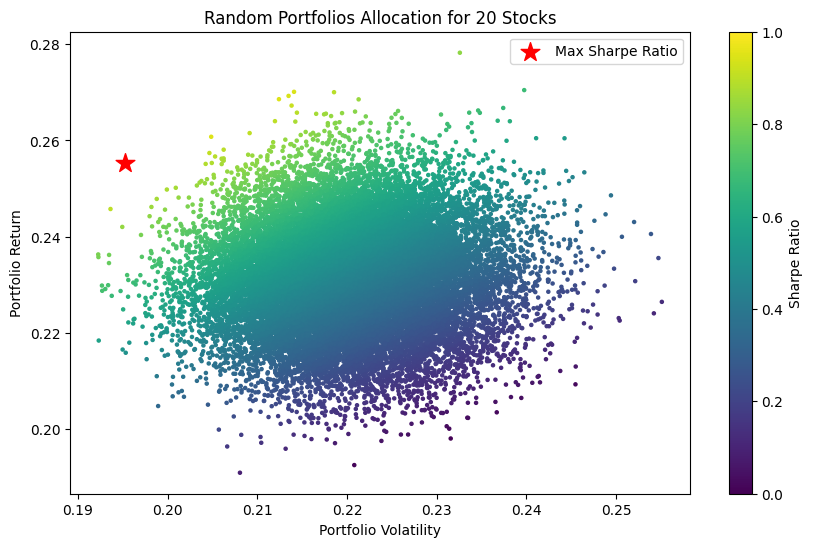

In [30]:
plt.figure(figsize= (10, 6))
plt.scatter(port_std_20, port_ret_20, c= port_sharpe_ratio_20, s= 5)
plt.scatter(max_sharpe_std_20, max_sharpe_return_20, marker= '*', color= 'r', s= 200, label= 'Max Sharpe Ratio')
plt.title('Random Portfolios Allocation for 20 Stocks')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.legend()
plt.colorbar(label= 'Sharpe Ratio')
plt.show()

In [31]:
top_sharpe_ratio_20 = np.argsort(port_sharpe_ratio_20)[::-1]

for i in range(5):
  top_portfolio_index = top_sharpe_ratio_20[i]
  top_sharpe_ratio = port_sharpe_ratio_20[top_portfolio_index]
  print(f"Top {i+1} Sharpe Ratio: {top_sharpe_ratio}, Portfolio: {top_portfolio_index}")

Top 1 Sharpe Ratio: 1.0513747182295201, Portfolio: 10514
Top 2 Sharpe Ratio: 1.0290812635432764, Portfolio: 15016
Top 3 Sharpe Ratio: 1.0288826021615676, Portfolio: 23544
Top 4 Sharpe Ratio: 1.0281349952667926, Portfolio: 10811
Top 5 Sharpe Ratio: 1.027110979330177, Portfolio: 22112


In [32]:
best_portfolio_20 = pd.DataFrame({'Stock': stock_list_20, 'Weight': weight_20_list[10514]})
best_portfolio_20

,Stock,Weight
0,ACB,0.036750
1,BID,0.007533
2,CTG,0.033824
3,FPT,0.148947
4,GAS,0.063094
5,GVR,0.066088
6,HPG,0.007581
7,HDB,0.014550
8,KDH,0.140584
9,MBB,0.001298


## Portfolio Optimisation for 30 stocks

In [33]:
stock_30 = stock_data_pct_change.copy()
stock_list_30 = stock_30.columns.values
stock_list_30

array(['ACB', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG',
       'KDH', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'PNJ', 'POW',
       'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIC', 'VJC',
       'VNM', 'VPB', 'VRE'], dtype=object)

In [34]:
stock_30.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2017-08-31 to 2022-09-23
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACB     442 non-null    float64
 1   BID     1267 non-null   float64
 2   BVH     1267 non-null   float64
 3   CTG     1267 non-null   float64
 4   FPT     1267 non-null   float64
 5   GAS     1267 non-null   float64
 6   GVR     632 non-null    float64
 7   HDB     1177 non-null   float64
 8   HPG     1267 non-null   float64
 9   KDH     1267 non-null   float64
 10  MBB     1267 non-null   float64
 11  MSN     1267 non-null   float64
 12  MWG     1267 non-null   float64
 13  NVL     1267 non-null   float64
 14  PDR     1267 non-null   float64
 15  PLX     1267 non-null   float64
 16  PNJ     1267 non-null   float64
 17  POW     922 non-null    float64
 18  SAB     1267 non-null   float64
 19  SSI     1267 non-null   float64
 20  STB     1267 non-null   float64
 21  TCB     1079 non-nu

In [35]:
np.random.seed(0)
weight_30 = np.random.random(30)
weight_30 = weight_30/sum(weight_30)
weight_30

array([0.0314802 , 0.0410236 , 0.03457479, 0.03125475, 0.02430104,
       0.03704879, 0.02510021, 0.05115252, 0.05527615, 0.02199438,
       0.04541372, 0.03033766, 0.0325833 , 0.05309266, 0.00407466,
       0.00499778, 0.00115974, 0.04775946, 0.04463543, 0.0499043 ,
       0.056134  , 0.04584011, 0.02647067, 0.04477152, 0.00678428,
       0.03670617, 0.00822281, 0.05418665, 0.02993346, 0.0237852 ])

In [36]:
port_ann_ret_30 = np.dot(weight_30, np.mean(stock_30))*250

print('Annual Portfolio Return of 30 Stocks:')
print(port_ann_ret_30)

Annual Portfolio Return of 30 Stocks:
0.17373429173115187


C:\Users\Admins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [37]:
port_ann_std_30 = np.sqrt(np.dot(np.dot(weight_30,stock_30.cov()),np.transpose(weight_30)))*np.sqrt(250)
print('Annual Portfolio Volatility of 30 Stocks:')
print(port_ann_std_30)

Annual Portfolio Volatility of 30 Stocks:
0.22283664628522823


### Portfolio Optimisation applying the Monte Carlo Simulation

In [38]:
num_portfolios = 25000
port_ret_30 = []
port_std_30 = []
port_sharpe_ratio_30 = []
weight_30_list = []
rfr = 0.05

for i in range(num_portfolios):
  np.random.seed(i)
  weight_30 = np.random.random(30)
  weight_30 = weight_30/sum(weight_30)
  weight_30_list.append(weight_30)
  port_ann_ret_30 = np.dot(weight_30,stock_30.mean())*250
  port_ann_std_30 = np.sqrt(np.dot(np.dot(weight_30,stock_30.cov()), np.transpose(weight_30)))*np.sqrt(250)
  port_ret_30.append(port_ann_ret_30)
  port_std_30.append(port_ann_std_30)
  sharpe_ratio_30 = (port_ann_ret_30 - rfr) / port_ann_std_30
  port_sharpe_ratio_30.append(sharpe_ratio_30)

In [39]:
max_sharpe_idx_30 = np.argmax(port_sharpe_ratio_30)
max_sharpe_ratio_30 = port_sharpe_ratio_30[max_sharpe_idx_30]
max_sharpe_return_30 = port_ret_30[max_sharpe_idx_30]
max_sharpe_std_30 = port_std_30[max_sharpe_idx_30]

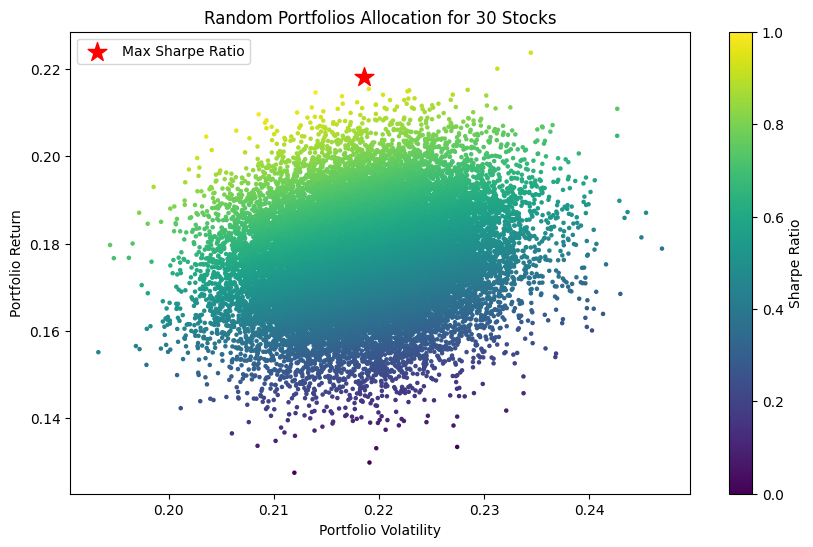

In [40]:
plt.figure(figsize= (10, 6))
plt.scatter(port_std_30, port_ret_30, c= port_sharpe_ratio_30, s= 5)
plt.scatter(max_sharpe_std_30, max_sharpe_return_30, marker= '*', color= 'r', s= 200, label= 'Max Sharpe Ratio')
plt.title('Random Portfolios Allocation for 30 Stocks')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.legend()
plt.colorbar(label='Sharpe Ratio')
plt.show()

In [41]:
top_sharpe_ratio_30 = np.argsort(port_sharpe_ratio_30)[::-1]

for i in range(5):
  top_portfolio_index = top_sharpe_ratio_30[i]
  top_sharpe_ratio = port_sharpe_ratio_30[top_portfolio_index]
  print(f"Top {i+1} Sharpe Ratio: {top_sharpe_ratio}, Portfolio: {top_portfolio_index}")

Top 1 Sharpe Ratio: 0.7695523780781084, Portfolio: 13731
Top 2 Sharpe Ratio: 0.7693240195452303, Portfolio: 24067
Top 3 Sharpe Ratio: 0.7652197123103449, Portfolio: 22020
Top 4 Sharpe Ratio: 0.7589874789867878, Portfolio: 10803
Top 5 Sharpe Ratio: 0.7564568235263881, Portfolio: 23288


In [42]:
best_portfolio_30 = pd.DataFrame({'Stock': stock_list_30, 'Weight': weight_30_list[13731]})
best_portfolio_30

,Stock,Weight
0,ACB,0.075638
1,BID,0.003844
2,BVH,0.038013
3,CTG,0.012611
4,FPT,0.054432
5,GAS,0.004527
6,GVR,0.060593
7,HDB,0.037516
8,HPG,0.010058
9,KDH,0.073239
